In [1]:
import crocoddyl
import pinocchio
from IPython.display import HTML
import mim_solvers
import numpy as np
import random
from matplotlib import animation
from matplotlib import pyplot as plt
from PointMass_utils import *
from PointMass_model import *

In [2]:
nx = 4
nu = 2
T = 50
start_point = np.array([0, 0, 0, 0])
target_low = np.array([10, 0, 0, 0])
target_high = np.array([10, 10, 0, 0])
obs_act = 2
obs0 = Obstacle(3, 4, 2, obs_act, 'Obs0')
obs1 = Obstacle(7, 5, 1, obs_act, 'Obs1')
obs2 = Obstacle(8, 8, 1, obs_act, 'Obs2')
obs3 = Obstacle(8, 8, 1, obs_act, 'Obs3')
obs4 = Obstacle(4, 4, 1, obs_act, 'Obs4')
obs5 = Obstacle(6, 7.5, 1, obs_act, 'Obs5')
obs6 = Obstacle(7.5, 3, 1, obs_act, 'Obs6')
obs7 = Obstacle(5, 1, 1, obs_act, 'Obs7')
obs8 = Obstacle(2.5, 2, 1, obs_act, 'Obs8')
obs_set = [obs1, obs2, obs3]#, obs4, obs5, obs6, obs7, obs8]
# obs_set = [obs0]
translation_cost = XReg(nx, target_high, 'trans_high')
xreg = XReg(nx, start_point, 'XReg')
ureg = UReg(nu, None, 'UReg')

cost_set = Costs()
cost_set.add_cost(translation_cost)
cost_set.add_cost(xreg)
cost_set.add_cost(ureg)
# cost_set.add_cost(obs0)
cost_set.add_cost(obs1)
cost_set.add_cost(obs2)
cost_set.add_cost(obs3)
# cost_set.add_cost(obs4)
# cost_set.add_cost(obs5)
# cost_set.add_cost(obs6)
# cost_set.add_cost(obs7)
# cost_set.add_cost(obs8)

nr = cost_set.nr

x0 = start_point
u0 = np.array([0.0, 0.0])
timeStep = 5e-2
max_iter = 500

In [3]:
# Desired Weights
w_run_possibles = np.array([10, 1., 1., 1000, 1000, 1000, 2000, 1000, 2000, 2000, 2000])
w_term_possibles = np.array([2000, 1., 1., 1000, 1000, 1000, 500, 0, 1000, 1000, 1000])
w_run = w_run_possibles[:nr]
w_term = w_term_possibles[:nr]
# obs_set = obs_set[:nr]
# w_des = np.hstack([w_run, w_term])
w_des = (np.hstack([w_run, w_term])/(np.max(np.hstack([w_run, w_term])))).copy()
# w_des = (np.hstack([w_run, w_term])/(np.linalg.norm(np.hstack([w_run, w_term])))).copy()

In [ ]:
xs_optimal, us_optimal, sqp_opt = get_results_from_model(cost_set, x0, u0, T, w_des, timeStep, max_iter, with_callback = True)

10 Trajectories Collected
20 Trajectories Collected
30 Trajectories Collected
40 Trajectories Collected
50 Trajectories Collected
60 Trajectories Collected
70 Trajectories Collected
Trajectory 78 Rejected
Trajectory 79 Rejected
Trajectory 80 Rejected
80 Trajectories Collected
Trajectory 88 Rejected
Trajectory 90 Rejected
90 Trajectories Collected
Trajectory 98 Rejected
Trajectory 99 Rejected
100 Trajectories Collected


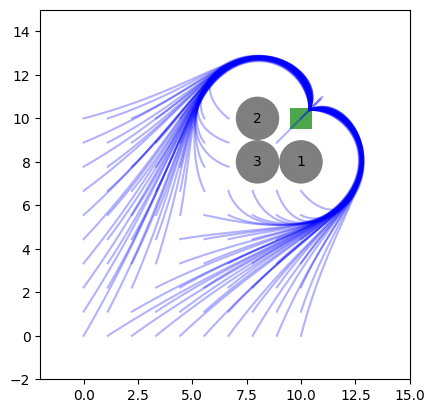

0


In [71]:
samples = 10
xlims = [0, 10]
ylims = [0, 10]
x0 = start_point
u0 = np.array([0.0, 0.0])
timeStep = 5e-2
max_iter = 500
XS_Set_optimal, US_Set_optimal = test_model_full(cost_set, obs_set, samples, xlims, ylims, T, w_des, timeStep, max_iter, with_callback = False)
print(plot_tested_model(XS_Set_optimal, obs_set, target_high))

In [4]:
plot_1_traj(xs_optimal, obs_set, target_high, label='Optimal', linemap = 'b')

iter     merit         cost         grad      step    ||gaps||        KKT
   1  1.01250e+02  1.01250e+02  2.91940e+01  1.0000  0.00000e+00  9.97972e+00
   2  3.01609e+00  3.01609e+00  5.59573e-02  1.0000  1.75138e-14  7.55501e-02
   3  2.97331e+00  2.97331e+00  3.58745e-01  1.0000  5.06917e-11  3.11857e-01
   4  2.77491e+00  2.77491e+00  7.12445e-01  1.0000  3.36121e-10  3.16733e-01
   5  2.61731e+00  2.61731e+00  7.62747e-02  1.0000  1.26762e-09  3.42886e-02
   6  2.60863e+00  2.60863e+00  6.07051e-02  1.0000  1.50395e-10  2.25152e-02
   7  2.60256e+00  2.60256e+00  5.00395e-02  1.0000  8.99342e-11  1.57213e-02
   8  2.59798e+00  2.59798e+00  3.02300e-01  1.0000  1.00357e-10  4.55592e-02
   9  2.57729e+00  2.57729e+00  2.69517e-01  1.0000  8.58399e-10  1.78476e-02
  10  2.56338e+00  2.56338e+00  2.54828e-01  1.0000  6.00672e-10  7.75933e-03
iter     merit         cost         grad      step    ||gaps||        KKT
  11  2.55130e+00  2.55130e+00  2.53501e-02  1.0000  5.87056e-10  1.7490

In [5]:
# HTML(animatePointMass(xs_optimal, obs_set, target_high).to_jshtml())

In [7]:
# Bad Running and Terminal Model
w_run = np.array([10, 1., 1., 0., 0., 0.])
w_term = np.array([1000, 1., 1., 0., 0., 0.])
# w_run = np.array([0, 0., 0., 0., 0., 0.])
# w_term = np.array([0, 0., 0., 0., 0., 0.])
w_bad = np.hstack([w_run, w_term])
# w_bad = (np.hstack([w_run, w_term])/(np.max(np.hstack([w_run, w_term])))).copy()
# w_bad = (np.hstack([w_run, w_term])/(np.linalg.norm(np.hstack([w_run, w_term])))).copy()
w_run = w_bad[:nr]; w_term = w_bad[nr:]

xs_non_optimal, us_non_optimal, sqp_non_opt = get_results_from_model(cost_set, x0, u0, T, w_bad, timeStep, max_iter, with_callback = False)

In [8]:
# HTML(animatePointMass(xs_non_optimal, obs_set, target_high).to_jshtml())

In [9]:
# plot_1_traj(xs_non_optimal, obs_set, target_high, label='Non-Optimal', linemap = 'r')

In [10]:
print('Desired Trajectory Cost:  ', cost_set.traj_cost(xs_optimal, us_optimal, w_des[:nr], w_des[nr:], timeStep), ' || other Trajectory, same cost:   ', cost_set.traj_cost(xs_non_optimal, us_non_optimal, w_des[:nr], w_des[nr:], timeStep))
print('Bad Trajectory Cost:      ', cost_set.traj_cost(xs_non_optimal, us_non_optimal, w_bad[:nr], w_bad[nr:], timeStep), ' || other Trajectory, same cost:   ', cost_set.traj_cost(xs_optimal, us_optimal, w_bad[:nr], w_bad[nr:], timeStep))

Desired Trajectory Cost:   1.4880389633500672  || other Trajectory, same cost:    3.0567175462881933
Bad Trajectory Cost:       1575.7213679850488  || other Trajectory, same cost:    2373.040681707434


In [11]:
###### IRL #######

In [76]:
# generating bad trajectories
num_bad = 5
scales = 3
xs_non_optimal_set = []
us_non_optimal_set = []
xs_non_optimal_set.append(np.stack(xs_non_optimal.tolist()).copy())
us_non_optimal_set.append(np.stack(us_non_optimal.tolist()).copy())
for _ in range(num_bad):
    # # Get one non-optimal sample from non-optimal demo
    Us = us_non_optimal.copy()+np.random.normal(0,scales,np.stack(us_non_optimal.tolist()).shape)
    us_non_optimal_set.append(Us)
    xs_non_optimal_set.append(np.stack(sqp_non_opt.problem.rollout([Us[i] for i in range(T)])))
    # # Get one non-optimal sample from optimal demo
    Us = us_optimal.copy()+np.random.normal(0,scales,np.stack(us_non_optimal.tolist()).shape)
    us_non_optimal_set.append(Us)
    xs_non_optimal_set.append(np.stack(sqp_non_opt.problem.rollout([Us[i] for i in range(T)])))

In [77]:
# opt_cost = np.exp(-cost_set.traj_cost(xs_optimal,us_optimal,w_des[:nr], w_des[nr:], timeStep))
# print(opt_cost)
# for X, U in zip(xs_non_optimal_set, us_non_optimal_set):
#     print('Modified: ', np.exp(-cost_set.traj_cost(X,U,w_bad[:nr], w_bad[nr:], timeStep))/opt_cost, 
#          'Original: ', np.exp(-cost_set.traj_cost(X,U,w_bad[:nr], w_bad[nr:], timeStep)))

In [78]:
# IRL Algorithm
from scipy.optimize import minimize
from scipy.optimize import Bounds

def fcn_w(x, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda = 0.001):
    x /= np.max(x)
    nr = cost_set.nr
    output = 0
    num = np.nextafter(0,1)
    den = np.nextafter(0,1)
    num += np.max([np.nextafter(0,1), np.exp(-cost_set.traj_cost(xs_optimal, us_optimal, x[:nr], x[nr:], dt))])
    den += num
    for Xs, Us in zip(xs_non_optimal_set, us_non_optimal_set):
        den += np.max([np.nextafter(0,1), np.exp(-cost_set.traj_cost(Xs, Us, x[:nr], x[nr:], dt))])
    output -= np.log(num/den)
    output += Lambda*np.linalg.norm(x)
    return output

def fcn_w_nSamples(x, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, samples, Lambda = 0.001):
    nr = cost_set.nr
    num_samples = samples # Have these number of samples per trajectory equidistantly starting from the beginning
    output = 0
    for i in np.int32(np.linspace(0, len(xs_optimal), num=num_samples+1))[:-1]:
        num = np.nextafter(0,1)
        den = np.nextafter(0,1)
        X_opt = xs_optimal[i:].copy(); U_opt = us_optimal[i:].copy()
        num += np.exp(-cost_set.traj_cost(X_opt, U_opt, x[:nr], x[nr:], dt))
        den += num
        for Xs, Us in zip(xs_non_optimal_set, us_non_optimal_set):
            X_nopt = Xs[i:].copy(); U_nopt = Us[i:].copy()
            den += np.max([np.nextafter(0,1), np.exp(-cost_set.traj_cost(X_nopt, U_nopt, x[:nr], x[nr:], dt))])
        output -= np.log(num/den)
    output += Lambda*np.linalg.norm(x)
    return output

def fcn_w_cum(x, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda = 0.001):
    return True

# def fcn_w_nD(x, cost_set, xs_optimal_set, us_optimal_set, xs_non_optimal_set, us_non_optimal_set, dt, Lambda = 0.001):
#     # x /= np.linalg.norm(x)
#     nr = cost_set.nr
#     output = 0
#     for Xs_opt, Us_opt in zip(xs_optimal_set, us_optimal_set):
#         num = np.nextafter(0,1)
#         den = np.nextafter(0,1)
#         num += np.exp(-cost_set.traj_cost(Xs_opt, Us_opt, x[:nr], x[nr:], dt))
#         den += num
#         for Xs, Us in zip(xs_non_optimal_set, us_non_optimal_set):
#             den += np.exp(-cost_set.traj_cost(Xs, Us, x[:nr], x[nr:], dt))
#         output -= np.log(num/den)
    
#     output += Lambda*np.linalg.norm(x)
#     return output



In [79]:
dt = timeStep
Lambda = 0.0
lb = 0.0; ub = np.inf
bnds = Bounds(lb, ub)
options = {'maxiter': 100, 'iprint': 1,'ftol': 1e-15 ,'gtol' : 1e-15}
tol = 1e-15
samples = 1
w0 = w_bad
# w0 = np.zeros_like(w_bad)
# w0 = w_des
# w0 = 10*np.ones_like(w_bad)

# 1 Optimal Demo
args=(cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda)
res = minimize(fcn_w, 
               w0, 
               args, 
               bounds=bnds, 
               method='L-BFGS-B', 
               tol = tol,
               options=options)
print(res)

# # 1 Optimal Demo, Multiple Samples
# args=(cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, samples, Lambda)
# res = minimize(fcn_w_nSamples, 
#                w0, 
#                args, 
#                bounds=bnds, 
#                method='L-BFGS-B', 
#                tol = tol,
#                options=options)
# print(res)


# WIRL = []
# for i in range(1,len(xs_non_optimal_set)):
#     xs_no_subset = xs_non_optimal_set[:i]
#     us_no_subset = us_non_optimal_set[:i]
#     res = minimize(fcn_w, 
#                    w0, 
#                    args=(cost_set, xs_optimal, us_optimal, xs_no_subset, us_no_subset, dt, Lambda), 
#                    bounds=bnds, 
#                    method='L-BFGS-B', 
#                    tol = tol,
#                    options=options)
#     WIRL.append(res.x)
#     print(res)

w_irl = res.x

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         6 variables are exactly at the bounds

At iterate    0    f=  1.71519D+00    |proj g|=  1.22832D+00

At iterate    1    f=  7.62178D-01    |proj g|=  2.85733D-01

At iterate    2    f=  6.99427D-01    |proj g|=  2.37200D-01

At iterate    3    f=  6.27684D-01    |proj g|=  1.70836D-01

At iterate    4    f=  6.11790D-01    |proj g|=  2.76603D-01

At iterate    5    f=  6.02104D-01    |proj g|=  1.01339D+00

At iterate    6    f=  5.94199D-01    |proj g|=  1.16811D+00

At iterate    7    f=  5.93935D-01    |proj g|=  1.14448D+00

At iterate    8    f=  5.93798D-01    |proj g|=  2.66434D-01

At iterate    9    f=  5.93421D-01    |proj g|=  3.15098D-01

At iterate   10    f=  5.93177D-01    |proj g|=  4.23962D-01

At iterate   11    f=  5.93045D-01    |proj g|=  3.11970D-01

At iterate   12    f=  5.90923D-01    |proj g|=  1.65824D-01

At iterate   13    f=  5.8


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   43    f=  4.91137D-01    |proj g|=  3.50743D-01

At iterate   44    f=  4.90603D-01    |proj g|=  3.52437D-01

At iterate   45    f=  4.90547D-01    |proj g|=  1.70886D-01

At iterate   46    f=  4.90383D-01    |proj g|=  3.39043D-01

At iterate   47    f=  4.89736D-01    |proj g|=  9.24430D-01

At iterate   48    f=  4.89068D-01    |proj g|=  8.56395D-01

At iterate   49    f=  4.86968D-01    |proj g|=  3.49893D-01

At iterate   50    f=  4.86706D-01    |proj g|=  3.49230D-01

At iterate   51    f=  4.86252D-01    |proj g|=  3.48498D-01

At iterate   52    f=  4.85586D-01    |proj g|=  1.74407D-01

At iterate   53    f=  4.85256D-01    |proj g|=  1.71232D-01

At iterate   54    f=  4.84789D-01    |proj g|=  1.65812D-01

At iterate   55    f=  4.84401D-01    |proj g|=  4.71109D-01

At iterate   56    f=  4.82692D-01    |proj g|=  1.34444D+00

At iterate   57    f=  4.82361D-01    |proj g|=  1.43135D+00

At iterate   58    f=  4.82336D-01    |proj g|=  1.43250D+00

At iter

In [80]:
w_irl

array([0.00000000e+00, 0.00000000e+00, 5.17575183e-03, 4.01241737e+00,
       2.52993562e+00, 4.02166137e+00, 4.01692506e+00, 2.70133764e-01,
       1.00000000e-03, 4.02079445e+00, 2.93329871e+00, 2.08148661e+00])

In [81]:
w_irl /= np.max(w_irl)
for i, cost in enumerate(cost_set.costs):
    print(cost.name, ':')
    print('Running || ', 'Desired: ', w_des[:nr][i], 'IRL: ', w_irl[:nr][i])
    print('Terminal || ', 'Desired: ', w_des[nr:][i], 'IRL: ', w_irl[nr:][i])
    print('')

trans_high :
Running ||  Desired:  0.005 IRL:  0.0
Terminal ||  Desired:  1.0 IRL:  0.9988222992475946

XReg :
Running ||  Desired:  0.0005 IRL:  0.0
Terminal ||  Desired:  0.0005 IRL:  0.06716969400453159

UReg :
Running ||  Desired:  0.0005 IRL:  0.001286968581740336
Terminal ||  Desired:  0.0005 IRL:  0.0002486534563402841

Obs1 :
Running ||  Desired:  0.5 IRL:  0.9977014469095422
Terminal ||  Desired:  0.5 IRL:  0.9997844370334339

Obs2 :
Running ||  Desired:  0.5 IRL:  0.6290772355029808
Terminal ||  Desired:  0.5 IRL:  0.7293748635534067

Obs3 :
Running ||  Desired:  0.5 IRL:  1.0
Terminal ||  Desired:  0.5 IRL:  0.5175688403485146



In [98]:
# w_irl = w_irl/np.max(w_irl)

In [99]:
print('Desired Trajectory Cost: ', cost_set.traj_cost(xs_optimal, us_optimal, w_des[:nr], w_des[nr:], timeStep), ' || with IRL Weight:  ', cost_set.traj_cost(xs_optimal, us_optimal, w_irl[:nr], w_irl[nr:], timeStep))
print('Bad Trajectory Cost:     ', cost_set.traj_cost(xs_non_optimal, us_non_optimal, w_bad[:nr], w_bad[nr:], timeStep), ' || with IRL Weight:  ', cost_set.traj_cost(xs_non_optimal, us_non_optimal, w_irl[:nr], w_irl[nr:], timeStep))

Desired Trajectory Cost:  1.4880389633500672  || with IRL Weight:   8.253178621272173
Bad Trajectory Cost:      1.575721367985049  || with IRL Weight:   10.908644914694587


In [84]:
# Test IRL Output
print('Desired Fcn:    ', fcn_w(w_des, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))
print('IRL Fcn:        ', fcn_w(w_irl, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))
print('Bad Fcn:        ', fcn_w(w_bad, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, Lambda))

Desired Fcn:     0.6739955536969839
IRL Fcn:         0.4664353034436005
Bad Fcn:         1.7151859410065453


In [85]:
# # Test IRL multiSample Output
# print('Desired Fcn:    ', fcn_w_nSamples(w_des, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, samples, Lambda))
# print('IRL Fcn:        ', fcn_w_nSamples(w_irl, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, samples, Lambda))
# print('Bad Fcn:        ', fcn_w_nSamples(w_bad, cost_set, xs_optimal, us_optimal, xs_non_optimal_set, us_non_optimal_set, dt, samples, Lambda))

In [86]:
# Run again with bad weights (zero for obstacles)
w_run = w_irl[:nr]
w_term = w_irl[nr:]
PM_DAM_running = DifferentialActionModelPointMass(cost_set, w_run)
PM_DAM_terminal = DifferentialActionModelPointMass(cost_set, w_term)
pmDataRunning = PM_DAM_running.createData()
pmDataTerminal = PM_DAM_terminal.createData()
PM_ND_R = crocoddyl.DifferentialActionModelNumDiff(PM_DAM_running, False)
PM_ND_T = crocoddyl.DifferentialActionModelNumDiff(PM_DAM_terminal, False)
timeStep = 5e-2
PM_IAM = crocoddyl.IntegratedActionModelEuler(PM_ND_R, timeStep)
PM_IAM_T = crocoddyl.IntegratedActionModelEuler(PM_ND_T, 0.0)
x0 = start_point
# x0 = np.array([5.0, 5.0, 0.0, 0.0])
u0 = np.array([0.0, 0.0])
problem = crocoddyl.ShootingProblem(x0, [PM_IAM] * T, PM_IAM_T)
# Creating the SQP solver
sqp = mim_solvers.SolverSQP(problem)
sqp.setCallbacks([crocoddyl.CallbackVerbose()])
sqp.with_callbacks=True
sqp.termination_tolerance = 1e-5
# xs_init = [x0 for i in range(T+1)]
# us_init = [u0 for i in range(T)]
xs_init = [xs_optimal[i] for i in range(T+1)]
us_init = [us_optimal[i] for i in range(T)]

# Solving this problem
done = sqp.solve(xs_init, us_init, 500)
xs_output = np.stack(sqp.xs.tolist().copy())
us_output = np.stack(sqp.us.tolist().copy())

iter     merit         cost         grad      step    ||gaps||        KKT
   1  8.25318e+00  8.25318e+00  1.09292e+01  1.0000  3.29212e-10  4.21062e-01
   2  8.10469e+00  8.10469e+00  1.72547e+00  1.0000  2.37613e-08  1.98188e-02
   3  8.10263e+00  8.10263e+00  1.82659e-01  1.0000  3.89154e-09  6.45515e-04
   4  8.10260e+00  8.10260e+00  4.94722e-03  1.0000  4.28863e-10  1.82076e-05
 END  8.10260e+00  8.10260e+00  9.59227e-06   ----   9.02091e-12  2.15893e-08


In [87]:
print('IRL Trajectory Cost:  ', cost_set.traj_cost(xs_output, us_output, w_irl[:nr], w_irl[nr:], timeStep))
print('with Desired Weight:  ', cost_set.traj_cost(xs_output, us_output, w_des[:nr], w_des[nr:], timeStep)) 
print('with Bad Weight:      ', cost_set.traj_cost(xs_output, us_output, w_bad[:nr], w_bad[nr:], timeStep))

IRL Trajectory Cost:   8.10259799274409
with Desired Weight:   1.6023204902407375
with Bad Weight:       2.394132771056052


In [88]:
print('IRL Trajectory Cost:      ', cost_set.traj_cost(xs_output, us_output, w_irl[:nr], w_irl[nr:], timeStep))
print('Desired Trajectory Cost:  ', cost_set.traj_cost(xs_optimal, us_optimal, w_des[:nr], w_des[nr:], timeStep))

IRL Trajectory Cost:       8.10259799274409
Desired Trajectory Cost:   1.4880389633500672


In [89]:
print('IRL Trajectory with Desired Cost: ', cost_set.traj_cost(xs_output, us_output, w_des[:nr], w_des[nr:], timeStep))
print('Initial Optimal Trajectory Cost:  ', cost_set.traj_cost(xs_optimal, us_optimal, w_des[:nr], w_des[nr:], timeStep))

IRL Trajectory with Desired Cost:  1.6023204902407375
Initial Optimal Trajectory Cost:   1.4880389633500672


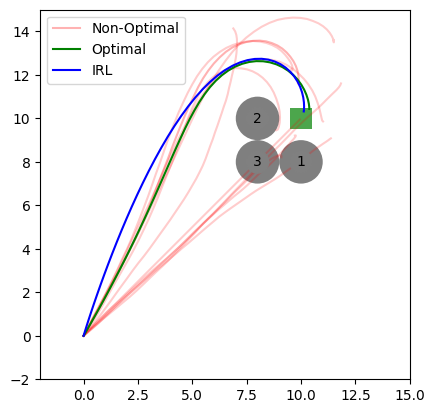

In [90]:
plot_results(xs_optimal, xs_non_optimal_set, xs_output, obs_set, target_high)

10 Trajectories Collected
20 Trajectories Collected
30 Trajectories Collected
40 Trajectories Collected
50 Trajectories Collected
60 Trajectories Collected
70 Trajectories Collected
Trajectory 78 Rejected
Trajectory 79 Rejected
Trajectory 80 Rejected
80 Trajectories Collected
Trajectory 88 Rejected
Trajectory 90 Rejected
90 Trajectories Collected
Trajectory 98 Rejected
Trajectory 99 Rejected
100 Trajectories Collected


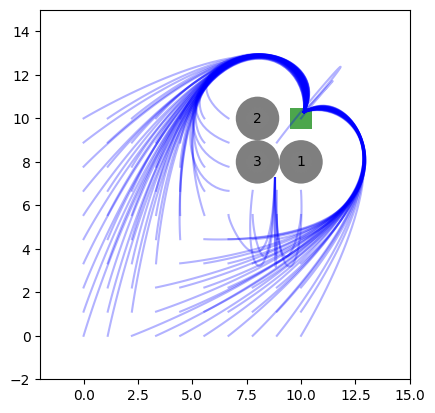

0


In [91]:
samples = 10
xlims = [0, 10]
ylims = [0, 10]
x0 = start_point
u0 = np.array([0.0, 0.0])
timeStep = 5e-2
max_iter = 500
XS_Set, US_Set = test_model_full(cost_set, obs_set, samples, xlims, ylims, T, w_irl, timeStep, max_iter, with_callback = False)
print(plot_tested_model(XS_Set, obs_set, target_high))

In [92]:
# creating sets
all_set_x = []
all_set_u = []
training_set_x = []
training_set_u = []

all_set_x.append(xs_output); all_set_x.append(xs_optimal); training_set_x.append(xs_optimal)
all_set_u.append(us_output); all_set_u.append(us_optimal); training_set_u.append(us_optimal)

for X, U in zip(xs_non_optimal_set, us_non_optimal_set):
    all_set_x.append(X); training_set_x.append(X)
    all_set_u.append(U); training_set_u.append(U)

In [93]:
P_irl = distributions(cost_set, training_set_x, training_set_u, w_irl[:nr], w_irl[nr:], dt)
P_des = distributions(cost_set, training_set_x, training_set_u, w_des[:nr], w_des[nr:], dt)
P_comp = distributions(cost_set, all_set_x, all_set_u, w_irl[:nr], w_irl[nr:], dt)  

In [94]:
P_comp/np.max(P_comp)

array([1.00000000e+00, 8.60208370e-01, 6.04434585e-02, 1.16405174e-03,
       2.27774485e-01, 7.17551973e-03, 3.27145940e-02, 1.12560472e-02,
       3.42524908e-06, 2.75548654e-04, 1.88404102e-02, 3.16246845e-09,
       1.51575025e-01])

In [95]:
P_irl/np.max(P_irl)

array([1.00000000e+00, 7.02660664e-02, 1.35322066e-03, 2.64789896e-01,
       8.34160650e-03, 3.80310110e-02, 1.30852565e-02, 3.98188299e-06,
       3.20327799e-04, 2.19021471e-02, 3.67639814e-09, 1.76207335e-01])

In [96]:
P_des/np.max(P_des)

array([1.00000000e+00, 2.08320279e-01, 2.73339467e-03, 3.18869142e-01,
       4.10808967e-02, 2.10891956e-02, 4.65654136e-02, 9.99214921e-05,
       5.70355961e-03, 4.51783732e-02, 1.29335553e-08, 2.72421012e-01])

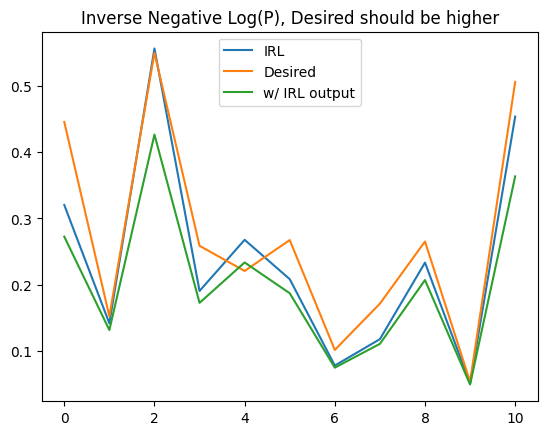

In [97]:
plt.plot(-1/np.log(P_irl[1:]),label='IRL')
plt.plot(-1/np.log(P_des[1:]),label='Desired')
plt.plot(-1/np.log(P_comp[2:]),label='w/ IRL output')
plt.legend()
plt.title('Inverse Negative Log(P), Desired should be higher')
plt.show()